### Simpson's paradox

In [83]:
import pandas as pd

FILEPATH=r'/Users/NVishwakarma/Documents/PersonalProjects/Cookbook/Files/Berkeley.csv'
berkeley_data = pd.read_csv(FILEPATH)
berkeley_data#[['Gender']]

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
1,Rejected,Male,A,313
2,Admitted,Female,A,89
3,Rejected,Female,A,19
4,Admitted,Male,B,353
5,Rejected,Male,B,207
6,Admitted,Female,B,17
7,Rejected,Female,B,8
8,Admitted,Male,C,120
9,Rejected,Male,C,205


##### Total number of people applied

In [84]:
berkeley_data.groupby(['Gender']).sum()

,Freq
Gender,
Female,1835
Male,2691


##### Gender distribution by Department

In [85]:
berkeley_data.groupby(['Gender', 'Dept'], as_index=False).sum().sort_values('Dept')

,Gender,Dept,Freq
0,Female,A,108
6,Male,A,825
1,Female,B,25
7,Male,B,560
2,Female,C,593
8,Male,C,325
3,Female,D,375
9,Male,D,417
4,Female,E,393
10,Male,E,191


##### percentage of male and female applied

In [86]:
berkeley_data.groupby(['Gender']).sum().apply(lambda x: 100 * x/x.sum())

,Freq
Gender,
Female,40.543526
Male,59.456474


##### Admittance for Male and Female

In [87]:
berkeley_data.groupby(['Gender', 'Admit']).sum()

Freq
Gender Admit         
Female Admitted   557
       Rejected  1278
Male   Admitted  1198
       Rejected  1493

##### Admittance percent for male and female

In [88]:
berkeley_data.groupby(['Gender', 'Admit']).sum().apply(lambda x: 100 * x/x.sum())

Freq
Gender Admit              
Female Admitted  12.306673
       Rejected  28.236854
Male   Admitted  26.469289
       Rejected  32.987185

In [89]:
Total = berkeley_data['Freq'].sum()
Total

4526

##### Overall Percentage for department and gender

In [90]:
berkeley_data_by_dept = berkeley_data.groupby(['Gender', 'Admit', 'Dept'], as_index=False).sum()
berkeley_data_by_dept['Percentage']=berkeley_data_by_dept['Freq'] * 100/ Total
#berkeley_data.groupby(['Gender', 'Admit', 'Dept']).sum().apply(lambda x: 100 * x/x.sum())
berkeley_data_by_dept.sort_values('Dept')#.to_csv('/Users/NVishwakarma/Documents/PersonalProjects/Cookbook/Files/percent.csv')

,Gender,Admit,Dept,Freq,Percentage
0,Female,Admitted,A,89,1.966416
12,Male,Admitted,A,512,11.312417
18,Male,Rejected,A,313,6.915599
6,Female,Rejected,A,19,0.419797
13,Male,Admitted,B,353,7.799381
7,Female,Rejected,B,8,0.176757
19,Male,Rejected,B,207,4.573575
1,Female,Admitted,B,17,0.375608
8,Female,Rejected,C,391,8.638975
2,Female,Admitted,C,202,4.463102


In [91]:
df = pd.DataFrame({'size':['big', 'big', 'small', 'small'], 'amount':[1, 9, 3, 1]})
#df['pct'] = df.groupby('size')['amount'].apply(lambda x: x.astype(float)/x.sum())
df


,amount,size
0,1,big
1,9,big
2,3,small
3,1,small


In [96]:
berkeley_data['percent_by_dept']=berkeley_data.groupby(['Dept'])['Freq'].apply(lambda x: x.astype(float)*100/x.sum())
berkeley_data.sort_values(['Dept', 'Admit'])

,Admit,Gender,Dept,Freq,percent_by_dept
0,Admitted,Male,A,512,54.876742
2,Admitted,Female,A,89,9.539121
1,Rejected,Male,A,313,33.547696
3,Rejected,Female,A,19,2.036442
4,Admitted,Male,B,353,60.341880
6,Admitted,Female,B,17,2.905983
5,Rejected,Male,B,207,35.384615
7,Rejected,Female,B,8,1.367521
8,Admitted,Male,C,120,13.071895
10,Admitted,Female,C,202,22.004357


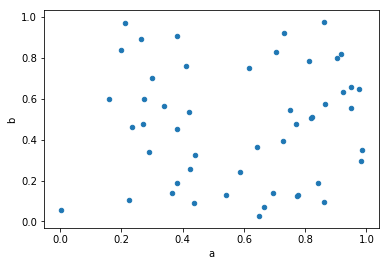

In [97]:
import numpy as np
berkeley_data.columns
df = pd.DataFrame(np.random.rand(50,4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='scatter', x='a', y='b');
#df#.columns

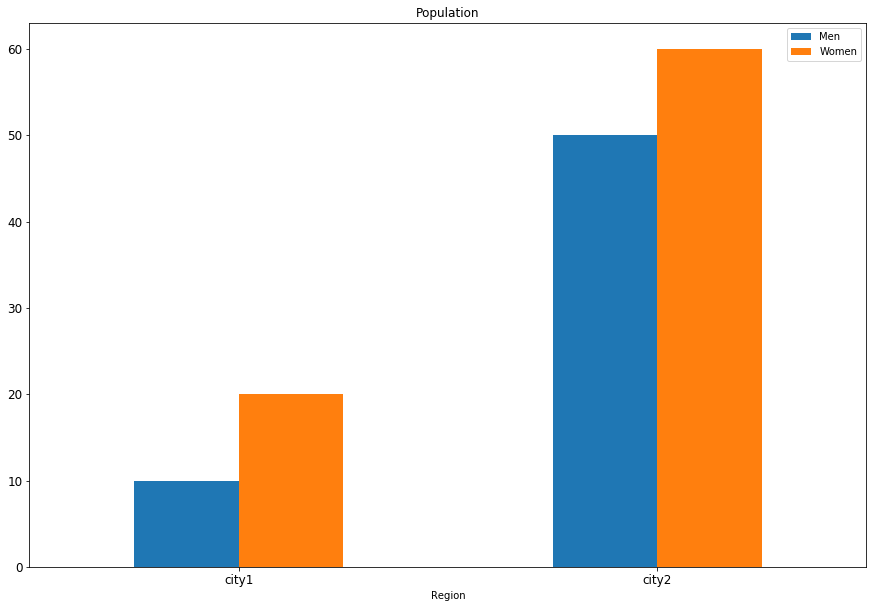

In [98]:
df1 = {'Region':['city1', 'city2'], 'Men':[10, 50], 'Women':[20, 60]}
df1 = pd.DataFrame(df1)
df1.plot.bar(x='Region', rot=0, title='Population', figsize=(15,10), fontsize=12)

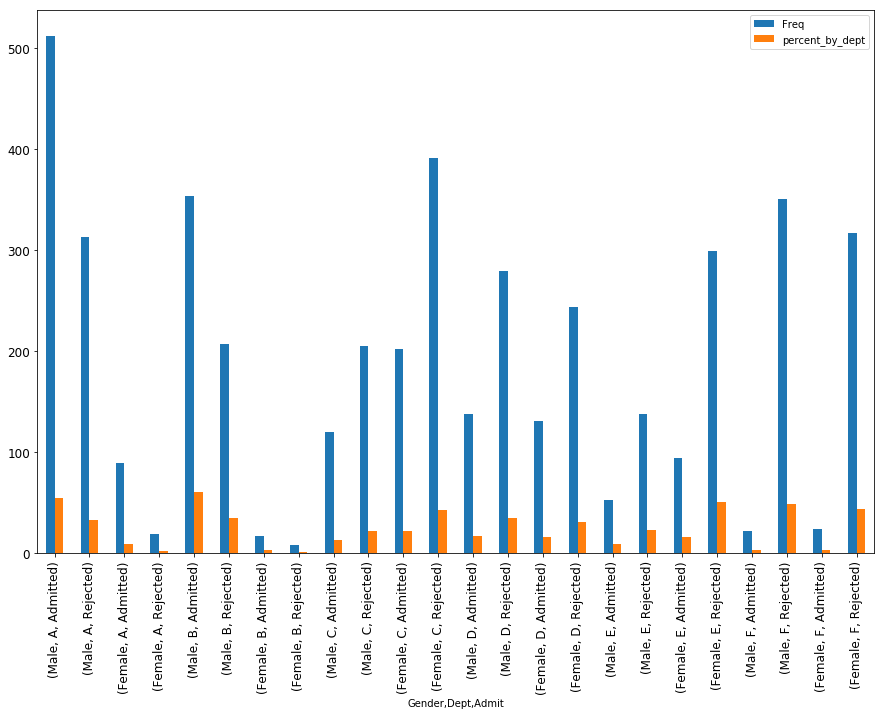

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
#berkeley_data_s = berkeley_data['Freq']
berkeley_data.plot.bar(x=['Gender', 'Dept', 'Admit'], figsize=(15,10), fontsize=12)
#berkeley_data = berkeley_data.cumsum()
#plt.figure()
#df.plot()

In [100]:
berkeley_data.groupby(['Gender', 'Admit', 'Dept']).sum().apply(lambda x: 100 * x/x.sum())

Freq  percent_by_dept
Gender Admit    Dept                            
Female Admitted A      1.966416         1.589854
                B      0.375608         0.484330
                C      4.463102         3.667393
                D      2.894388         2.756734
                E      2.076889         2.682648
                F      0.530270         0.560224
       Rejected A      0.419797         0.339407
                B      0.176757         0.227920
                C      8.638975         7.098765
                D      5.391074         5.134680
                E      6.606275         8.533105
                F      7.003977         7.399627
Male   Admitted A     11.312417         9.146124
                B      7.799381        10.056980
                C      2.651348         2.178649
                D      3.049050         2.904040
                E      1.171012         1.512557
                F      0.486080         0.513539
       Rejected A      6.915599         5.591283
                B      4.573575         5.897436
                C      4.529386         3.721859
                D      6.164384         5.871212
                E      3.049050         3.938356
                F      7.755192         8.193277

In [10]:
male_admitted = berkeley_data[(berkeley_data['Gender']=='Male') & (berkeley_data['Admit']=='Admitted')]
male_admitted

,Admit,Gender,Dept,Freq
0,Admitted,Male,A,512
4,Admitted,Male,B,353
8,Admitted,Male,C,120
12,Admitted,Male,D,138
16,Admitted,Male,E,53
20,Admitted,Male,F,22


In [11]:
female_admitted = berkeley_data[(berkeley_data['Gender']=='Female') & (berkeley_data['Admit']=='Admitted')]
female_admitted

,Admit,Gender,Dept,Freq
2,Admitted,Female,A,89
6,Admitted,Female,B,17
10,Admitted,Female,C,202
14,Admitted,Female,D,131
18,Admitted,Female,E,94
22,Admitted,Female,F,24


In [13]:
male_rejected = berkeley_data[(berkeley_data['Gender']=='Male') & (berkeley_data['Admit']=='Rejected')]
male_rejected

,Admit,Gender,Dept,Freq
1,Rejected,Male,A,313
5,Rejected,Male,B,207
9,Rejected,Male,C,205
13,Rejected,Male,D,279
17,Rejected,Male,E,138
21,Rejected,Male,F,351


In [14]:
female_rejected = berkeley_data[(berkeley_data['Gender']=='Female') & (berkeley_data['Admit']=='Rejected')]
female_rejected

,Admit,Gender,Dept,Freq
3,Rejected,Female,A,19
7,Rejected,Female,B,8
11,Rejected,Female,C,391
15,Rejected,Female,D,244
19,Rejected,Female,E,299
23,Rejected,Female,F,317
